In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 펭귄 데이터 불러오기

penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [4]:
# 결측치 제거

penguins = penguins.dropna().reset_index(drop = True)

In [5]:
# 수치형 컬럼 정규화 진행

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# 정규화 대상 컬럼
features = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
features_normed = scaler.fit_transform(features)
features_normed

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778],
       ...,
       [0.66545455, 0.30952381, 0.84745763, 0.84722222],
       [0.47636364, 0.20238095, 0.6779661 , 0.69444444],
       [0.64727273, 0.35714286, 0.69491525, 0.75      ]])

In [6]:
# 정규화된 데이터로 기존 데이터 대체

penguins = penguins.assign(bill_length_mm = features_normed[:, 0],
                          bill_depth_mm = features_normed[:, 1],
                          flipper_length_mm = features_normed[:, 2],
                          body_mass_g = features_normed[:, 3])
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,Male
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,Female
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,Female
3,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,Female
4,Adelie,Torgersen,0.261818,0.892857,0.305085,0.263889,Male


In [7]:
# 범주형 컬럼 인코딩 진행

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# 범주형 컬럼

features = penguins[['species', 'island', 'sex']]
encoded = features.apply(encoder.fit_transform)
encoded

,species,island,sex
0,0,2,1
1,0,2,0
2,0,2,0
3,0,2,0
4,0,2,1
...,...,...,...
328,2,0,0
329,2,0,0
330,2,0,1
331,2,0,0


In [9]:
# 인코딩된 데이터로 기존 수치형 데이터 대체

penguins = penguins.assign(species = encoded['species'],
                          island = encoded['island'],
                          sex = encoded['sex'])
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,0.254545,0.666667,0.152542,0.291667,1
1,0,2,0.269091,0.511905,0.237288,0.305556,0
2,0,2,0.298182,0.583333,0.389831,0.152778,0
3,0,2,0.167273,0.738095,0.355932,0.208333,0
4,0,2,0.261818,0.892857,0.305085,0.263889,1
...,...,...,...,...,...,...,...
328,2,0,0.549091,0.071429,0.711864,0.618056,0
329,2,0,0.534545,0.142857,0.728814,0.597222,0
330,2,0,0.665455,0.309524,0.847458,0.847222,1
331,2,0,0.476364,0.202381,0.677966,0.694444,0


# PCA(주성분 분석)

- 차원축소
- 주성분 개수가 너무 많으면 차원을 많이 줄이지 못 함
- 주성분 개수가 너무 적으면 데이터 정보가 손실됨

#### 2차원 축소

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)     # 2차원으로 축소

pc = pca.fit_transform(penguins)
pc

array([[ 1.56665031, -0.59960613],
       [ 1.53978084,  0.34045829],
       [ 1.5440559 ,  0.33165532],
       [ 1.58220143,  0.31814621],
       [ 1.57854549, -0.6552833 ],
       [ 1.57343147,  0.3545387 ],
       [ 1.49882706, -0.6950823 ],
       [ 1.57561692,  0.36568241],
       [ 1.58336367, -0.67379852],
       [ 1.55066133, -0.69415446],
       [ 1.56776799,  0.3551328 ],
       [ 1.5614067 ,  0.30921705],
       [ 1.50688593, -0.73238848],
       [ 1.60868631,  0.37537145],
       [ 1.52944274, -0.74761084],
       [ 0.5476577 ,  0.74259496],
       [ 0.5105858 , -0.2156154 ],
       [ 0.50878278,  0.68231892],
       [ 0.46579091, -0.23360347],
       [ 0.46813675, -0.19968591],
       [ 0.51191308,  0.69627813],
       [ 0.48875604, -0.23343016],
       [ 0.49642405,  0.71867502],
       [ 0.57027677,  0.75233167],
       [ 0.48658022, -0.25290779],
       [ 1.03967865,  0.58304064],
       [ 1.03023438, -0.39408615],
       [ 1.02736184,  0.53595703],
       [ 1.01055795,

In [11]:
penguins_2d = pd.DataFrame(data = pc, columns = ['pc1', 'pc2'])
penguins_2d

,pc1,pc2
0,1.566650,-0.599606
1,1.539781,0.340458
2,1.544056,0.331655
3,1.582201,0.318146
4,1.578545,-0.655283
...,...,...
328,-1.339470,0.523993
329,-1.326006,0.515039
330,-1.394341,-0.522119
331,-1.315528,0.502121


Text(0.5, 1.0, '2d penguins data')

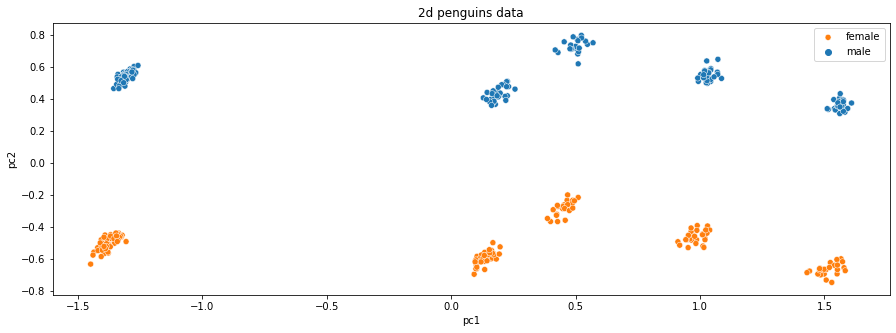

In [13]:
# 시각화

plt.figure(figsize = (15, 5))
sns.scatterplot(x = penguins_2d['pc1'], y = penguins_2d['pc2'], hue = penguins['sex'])
plt.legend(labels = ['female', 'male'])
plt.title('2d penguins data')

#### 3차원 축소

In [14]:
pca = PCA(n_components = 3)

pc = pca.fit_transform(penguins)
pc

array([[ 1.56665031e+00, -5.99606131e-01, -4.68377500e-01],
       [ 1.53978084e+00,  3.40458293e-01, -6.96616621e-01],
       [ 1.54405590e+00,  3.31655321e-01, -7.05502523e-01],
       [ 1.58220143e+00,  3.18146212e-01, -6.76191422e-01],
       [ 1.57854549e+00, -6.55283300e-01, -4.64096358e-01],
       [ 1.57343147e+00,  3.54538704e-01, -6.83033845e-01],
       [ 1.49882706e+00, -6.95082305e-01, -4.82491604e-01],
       [ 1.57561692e+00,  3.65682406e-01, -6.94398944e-01],
       [ 1.58336367e+00, -6.73798518e-01, -4.57456750e-01],
       [ 1.55066133e+00, -6.94154462e-01, -4.52759442e-01],
       [ 1.56776799e+00,  3.55132796e-01, -6.79041592e-01],
       [ 1.56140670e+00,  3.09217045e-01, -6.90159273e-01],
       [ 1.50688593e+00, -7.32388483e-01, -4.88726285e-01],
       [ 1.60868631e+00,  3.75371448e-01, -6.61860041e-01],
       [ 1.52944274e+00, -7.47610836e-01, -4.91279701e-01],
       [ 5.47657698e-01,  7.42594957e-01,  9.73816965e-01],
       [ 5.10585796e-01, -2.15615404e-01

In [15]:
penguins_3d = pd.DataFrame(data = pc, columns = ['pc1', 'pc2', 'pc3'])
penguins_3d

,pc1,pc2,pc3
0,1.566650,-0.599606,-0.468378
1,1.539781,0.340458,-0.696617
2,1.544056,0.331655,-0.705503
3,1.582201,0.318146,-0.676191
4,1.578545,-0.655283,-0.464096
...,...,...,...
328,-1.339470,0.523993,-0.188183
329,-1.326006,0.515039,-0.182203
330,-1.394341,-0.522119,0.010826
331,-1.315528,0.502121,-0.167670


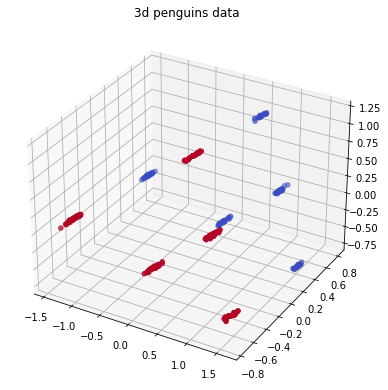

In [24]:
# 시각화

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10, 5))
axes = Axes3D(fig)     # 3차원 axes 생성
axes.scatter3D(penguins_3d['pc1'], penguins_3d['pc2'], penguins_3d['pc3'], cmap = 'coolwarm', c = penguins['sex'])
plt.title('3d penguins data')
plt.show()

# Kmeans 군집분석

- euclidean 거리 기반
- 최적 군집 수 결정 = elbow method
    - 군집 간 거리 합을 나타내는 inertia 지수가 급격히 떨어지는 지점을 적정 군집 수로 사용

In [25]:
from sklearn.cluster import KMeans

In [26]:
# 최적 군집 수 결정

inertia_list = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(penguins)
    inertia = kmeans.inertia_
    print('K: {} | inertia: {}'.format(k, inertia))
    inertia_list.append(inertia)

K: 2 | inertia: 246.5557608937348
K: 3 | inertia: 185.0071229249151
K: 4 | inertia: 126.99745748039616
K: 5 | inertia: 94.51743160528568
K: 6 | inertia: 66.78240259692572
K: 7 | inertia: 48.106446896841526
K: 8 | inertia: 35.284468871091796
K: 9 | inertia: 22.670630734408654


Text(0, 0.5, 'inertia')

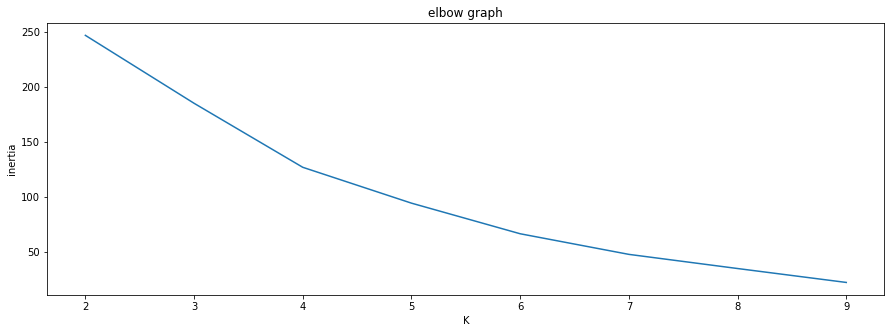

In [27]:
# 시각화

plt.figure(figsize = (15, 5))
sns.lineplot(x = k_range, y = inertia_list)
plt.title('elbow graph')
plt.xlabel('K')
plt.ylabel('inertia')

- k = 3으로 진행

In [32]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(penguins)

KMeans(n_clusters=3)

In [33]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
penguins['kmeans_cluster'] = kmeans.labels_
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,kmeans_cluster
0,0,2,0.254545,0.666667,0.152542,0.291667,1,1
1,0,2,0.269091,0.511905,0.237288,0.305556,0,1
2,0,2,0.298182,0.583333,0.389831,0.152778,0,1
3,0,2,0.167273,0.738095,0.355932,0.208333,0,1
4,0,2,0.261818,0.892857,0.305085,0.263889,1,1
...,...,...,...,...,...,...,...,...
328,2,0,0.549091,0.071429,0.711864,0.618056,0,0
329,2,0,0.534545,0.142857,0.728814,0.597222,0,0
330,2,0,0.665455,0.309524,0.847458,0.847222,1,0
331,2,0,0.476364,0.202381,0.677966,0.694444,0,0


Text(0.5, 1.0, 'kmeans clustering output')

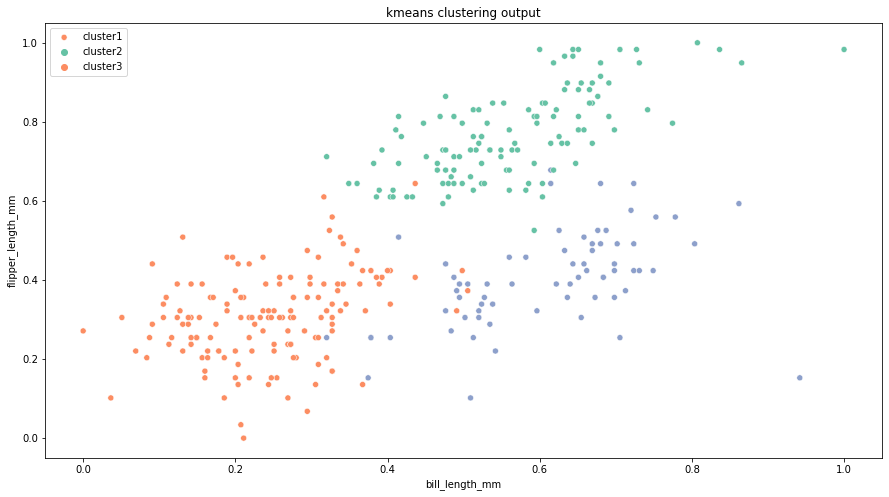

In [35]:
# 군집 결과 시각화

plt.figure(figsize = (15, 8))
sns.scatterplot(x = penguins['bill_length_mm'], y = penguins['flipper_length_mm'], hue = penguins['kmeans_cluster'], palette = 'Set2')
plt.legend(labels = ['cluster1', 'cluster2', 'cluster3'])
plt.title('kmeans clustering output')

# DBSCAN 군집 분석

- 밀도 기반 군집 분석
- kmeans는 군집 간 거리를 사용 vs DBSCAN은 높은 밀집성을 가진 부분끼리 군집화
- 군집 수를 미리 정할 필요 없음
- 비선형적 군집화: 형상이 균일하지 않은 모양의 군집도 잘 찾아냄

In [36]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.5)
dbscan.fit(penguins)

DBSCAN()

In [37]:
dbscan.labels_

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 3, 2, 3, 3, 2, 3,
       2, 2, 3, 4, 5, 4, 5, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5, 4, 5, 5, 4, 5,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4, 5, 5, 4, 5, 4, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 5, 4, 4, 5, 4, 5, 6, 7, 7, 6, 7, 6, 6, 7,
       6, 7, 6, 7, 6, 7, 6, 7, 7, 6, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7,
       6, 7, 6, 7, 7, 6, 6, 7, 6, 7, 7, 6, 7, 6, 6, 7, 6, 7, 7, 6, 6, 7,
       6, 7, 6, 7, 6, 7, 7, 6, 7, 6, 6, 7, 6, 7, 7, 6, 8, 9, 8, 9, 9, 8,
       8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 9, 8, 8, 9, 8, 9, 9, 8,
       9, 9, 8, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 9, 8, 8, 9, 8, 9, 8,
       9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 9, 8, 9, 8, 9, 9, 8,
       8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8,

In [38]:
penguins['dbscan_cluster'] = dbscan.labels_
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,kmeans_cluster,dbscan_cluster
0,0,2,0.254545,0.666667,0.152542,0.291667,1,1,0
1,0,2,0.269091,0.511905,0.237288,0.305556,0,1,1
2,0,2,0.298182,0.583333,0.389831,0.152778,0,1,1
3,0,2,0.167273,0.738095,0.355932,0.208333,0,1,1
4,0,2,0.261818,0.892857,0.305085,0.263889,1,1,0
...,...,...,...,...,...,...,...,...,...
328,2,0,0.549091,0.071429,0.711864,0.618056,0,0,8
329,2,0,0.534545,0.142857,0.728814,0.597222,0,0,8
330,2,0,0.665455,0.309524,0.847458,0.847222,1,0,9
331,2,0,0.476364,0.202381,0.677966,0.694444,0,0,8


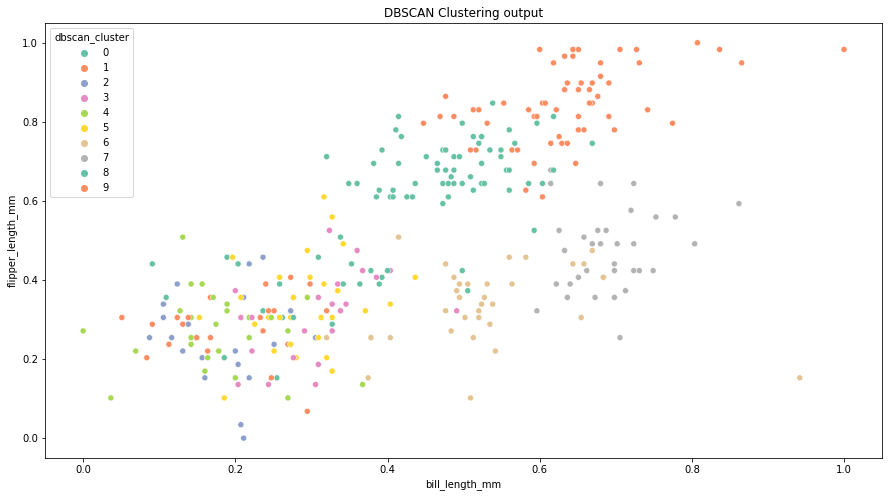

In [40]:
# 군집 결과 시각화

plt.figure(figsize = (15, 8))
sns.scatterplot(x = penguins['bill_length_mm'], y = penguins['flipper_length_mm'], hue = penguins['dbscan_cluster'], palette = 'Set2')
plt.title('DBSCAN Clustering output')
plt.show()